In [1]:
import os

import kagglehub
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
from pathlib import Path


In [2]:
#load last version of the dataset
# path_to_kaggle_data = Path(kagglehub.dataset_download("alexattia/the-simpsons-characters-dataset"))
# path_to_dataset = Path(os.path.join(path_to_kaggle_data, 'simpsons_dataset/simpsons_dataset'))
path_to_dataset = Path('/home/ilya/Documents/Classification-of-the-Simpsons/data/dataset')

In [3]:
train_val_files = sorted(list(path_to_dataset.rglob('*.jpg')))


In [4]:
simpsons_count = dict()

In [5]:
def check_count_simpsons(path):
    for simpson in os.listdir(path):
        simpsons_count[simpson] = len(os.listdir(os.path.join(path, simpson)))

    plt.figure(figsize=(17, 10))
    plt.barh(simpsons_count.keys(), simpsons_count.values(), color='skyblue')
    plt.xlabel('Counts')
    plt.ylabel('Simpsons')
    plt.tight_layout()
    plt.show()

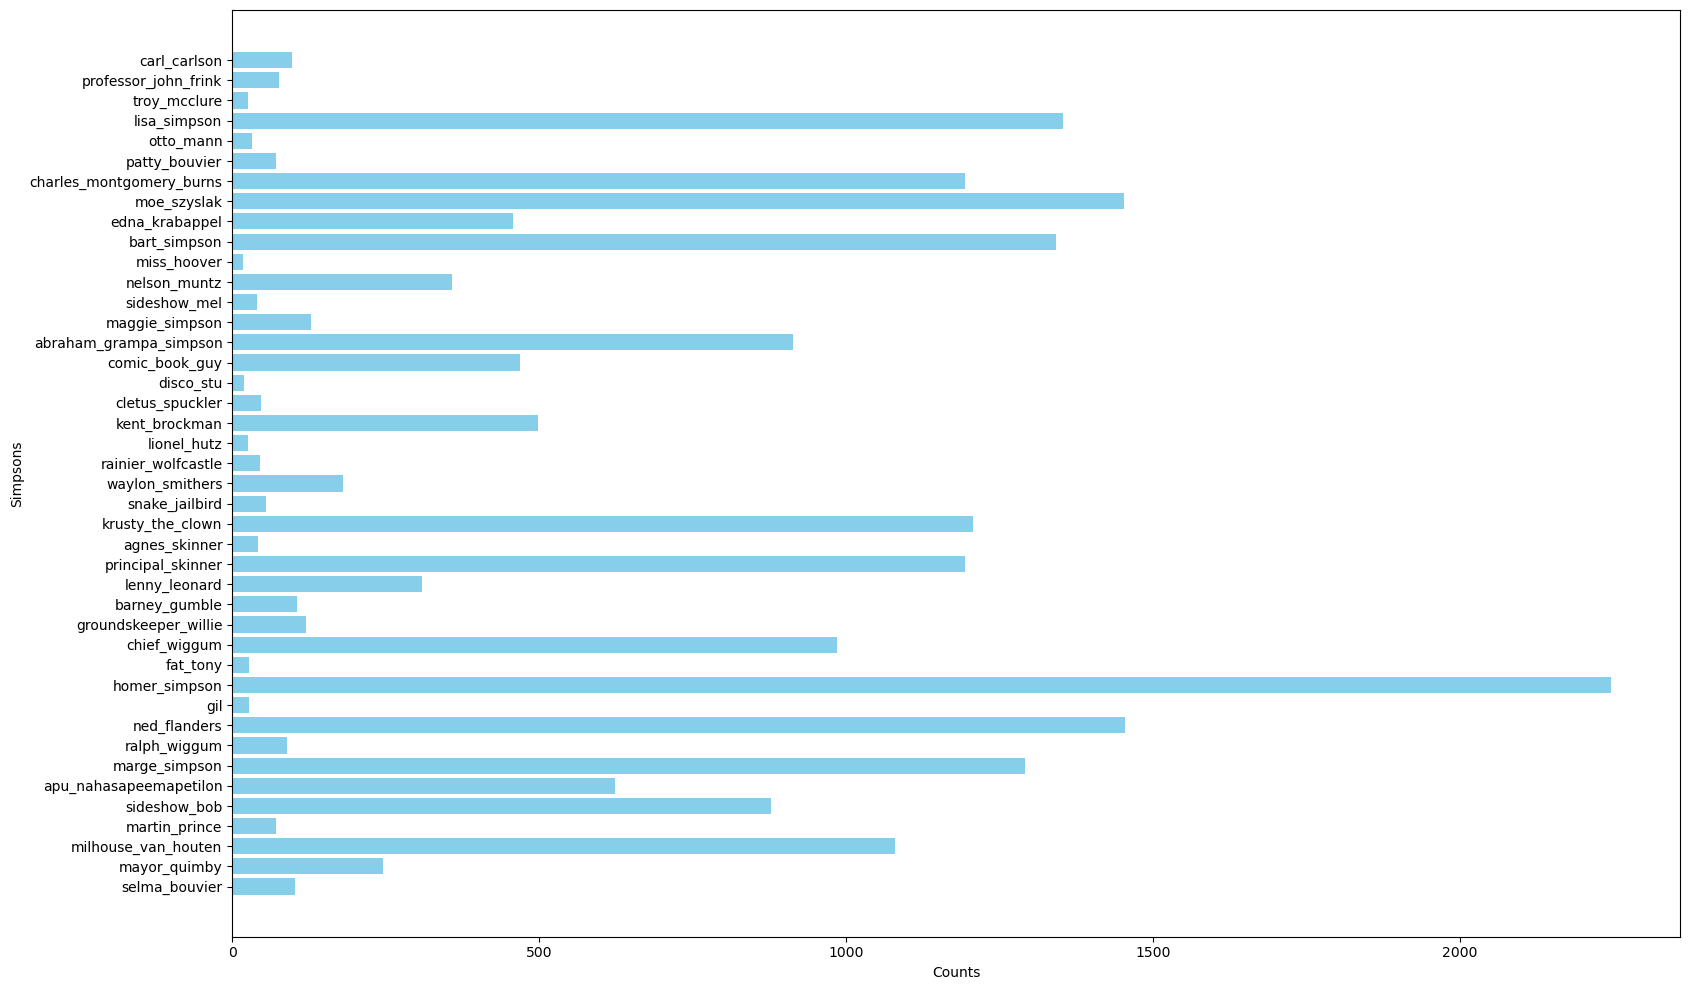

In [39]:
check_count_simpsons(path_to_dataset)

In [7]:
simpsons_count.keys()

dict_keys(['selma_bouvier', 'mayor_quimby', 'milhouse_van_houten', 'martin_prince', 'sideshow_bob', 'apu_nahasapeemapetilon', 'marge_simpson', 'ralph_wiggum', 'ned_flanders', 'gil', 'homer_simpson', 'fat_tony', 'chief_wiggum', 'groundskeeper_willie', 'barney_gumble', 'lenny_leonard', 'principal_skinner', 'agnes_skinner', 'krusty_the_clown', 'snake_jailbird', 'waylon_smithers', 'rainier_wolfcastle', 'lionel_hutz', 'kent_brockman', 'cletus_spuckler', 'disco_stu', 'comic_book_guy', 'abraham_grampa_simpson', 'maggie_simpson', 'sideshow_mel', 'nelson_muntz', 'miss_hoover', 'bart_simpson', 'edna_krabappel', 'moe_szyslak', 'charles_montgomery_burns', 'patty_bouvier', 'otto_mann', 'lisa_simpson', 'troy_mcclure', 'professor_john_frink', 'carl_carlson'])

In [8]:
max_count = max(simpsons_count.values())
max_count

2246

In [35]:
def load_image(path):
    image = Image.open(path)
    image.load()
    
    if image.mode in ('RGBA', 'LA', 'P'):
        image = image.convert('RGB')
    
    return image, image.size

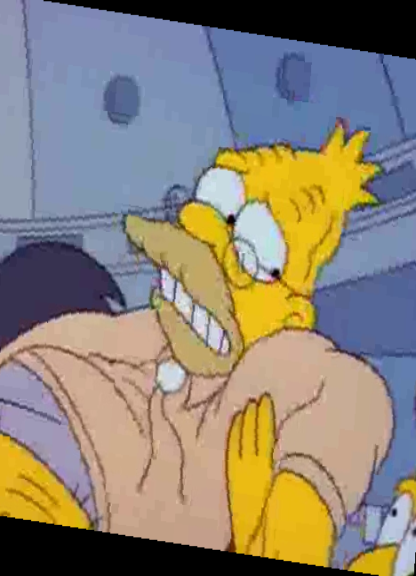

In [33]:
x, size = load_image(f'{path_to_dataset}/abraham_grampa_simpson/pic_0000.jpg')

transforms_train = transforms.Compose([
    transforms.RandomRotation(degrees=(-15, 15), expand=True),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomResizedCrop(size=size, scale=(0.6, 1)),
])

x = transforms_train(x)
x

In [36]:
for simpson in os.listdir(path_to_dataset):

    path_to_simpson_dir = os.path.join(path_to_dataset, simpson)
    img_list = os.listdir(path_to_simpson_dir)
    count_img_for_cur_simps = simpsons_count[simpson]

    path_list_to_simpson_imgs = []

    for img in img_list:
        path_list_to_simpson_imgs.append(os.path.join(path_to_simpson_dir, img))

    print(simpson, count_img_for_cur_simps, len(list(range(max_count - count_img_for_cur_simps))))
    
    for i in range(max_count - count_img_for_cur_simps):
        path_to_img = path_list_to_simpson_imgs[i % count_img_for_cur_simps]
        
        img, size = load_image(path_to_img)
        
        transform_img = transforms_train(img)
        transform_img.save(str(path_to_img)[:-4] + str(i + count_img_for_cur_simps) + ".jpg", "JPEG")


selma_bouvier 103 2143


KeyboardInterrupt: 

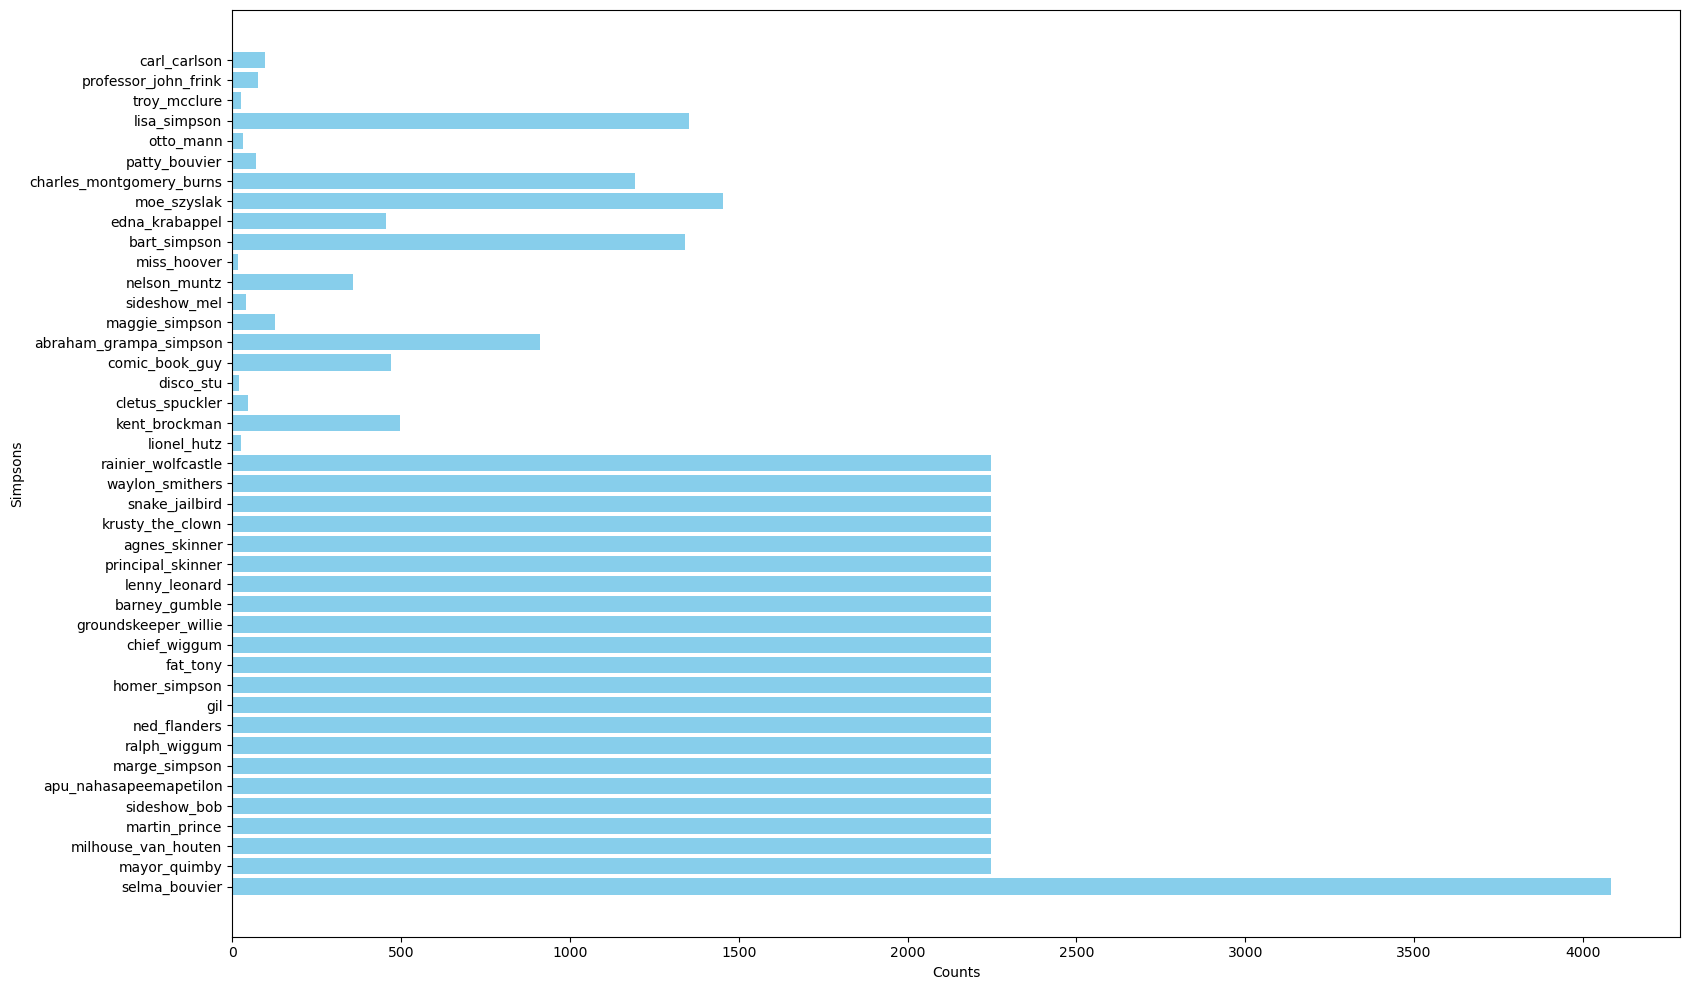

In [37]:
check_count_simpsons(path_to_dataset)